# Second Milestone Submitted by - 
- Yash Kalyani (yashk5@illinois.edu)
- Yash Bajaj (yashpb2@illinois.edu)
- Mayank Agarwal (mayanka5@illinois.edu)
- Debapratim Ghosh (dg19@illinois.edu)

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#from fancyimpute import IterativeImputer as MICE

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

---------------------------------------------

# Access Data

To access data, uncomment the required code block.

In [ ]:
# # For CSV file
# file_id = '1FNLJjNeEmy-HzUA_ghtjRYeJcXYJiGHS'
# download = drive.CreateFile({'id': file_id})
# download.GetContentFile('ChicagoData.csv')
# data = pd.read_csv("ChicagoData.csv")
# data.head()

# For Pickle Data file
file_id = '1iNTFeAEgyIVzXENvR6Hogg3sNSfIZPkX'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('data.pkl')
data = pd.read_pickle("data.pkl")
data.head()

# For Pickle Debug Data file
file_id = '18tivYo3gBtl3TOjP7xek6KMdP0I3e83y'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('debug.pkl')
data_debug = pd.read_pickle("debug.pkl")
data_debug.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,tsDate
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",1441459800
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",1441366200
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,1535760060
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",1441457100
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",1441458000


-------------------------------------------

# Exploratory Data Analysis

### Checking for Missing Values in the dataset

In [ ]:
round(data.isnull().sum()*100/data.shape[0],2)

ID                      0.00
Case Number             0.00
Date                    0.00
Block                   0.00
IUCR                    0.00
Primary Type            0.00
Description             0.00
Location Description    0.13
Arrest                  0.00
Domestic                0.00
Beat                    0.00
District                0.00
Ward                    8.04
Community Area          8.02
FBI Code                0.00
X Coordinate            1.06
Y Coordinate            1.06
Year                    0.00
Updated On              0.00
Latitude                1.06
Longitude               1.06
Location                1.06
tsDate                  0.00
dtype: float64

We can see that there are a few  variables like Location Description, X, Y Coordinate and Latitude and Longitude which have 1% or less missing values. We can remove these rows from our dataframe . On the other hand Ward and Community area have approx 8% missing values. We can replace these missing values with the word 'Missing' to preserve more information without dropping rows.

In [ ]:
## Removing missing values in the dataframe for location related variables 

data = data.dropna(subset=['Location Description', 'X Coordinate','Y Coordinate','Latitude','Longitude','Location'])
data_debug=data_debug.dropna(subset=['Location Description', 'X Coordinate','Y Coordinate','Latitude','Longitude','Location'])
## Replacing the remaining missing values with 'Missing'

data.fillna('Missing',inplace=True)
data_debug.fillna('Missing',inplace=True)

In [ ]:
round(data.isnull().sum()*100/data.shape[0],2)

ID                      0.0
Case Number             0.0
Date                    0.0
Block                   0.0
IUCR                    0.0
Primary Type            0.0
Description             0.0
Location Description    0.0
Arrest                  0.0
Domestic                0.0
Beat                    0.0
District                0.0
Ward                    0.0
Community Area          0.0
FBI Code                0.0
X Coordinate            0.0
Y Coordinate            0.0
Year                    0.0
Updated On              0.0
Latitude                0.0
Longitude               0.0
Location                0.0
tsDate                  0.0
dtype: float64

We can see that there are no longer any missing values in our dataset

### Checking the data type of each column in the datframe

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564117 entries, 0 to 7651596
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              object        
 12  Ward                  object        
 13  Community Area        object        
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

We can observe that there 4 columns which are integers, 1 date type column, 2 boolean columns, 7 numerical columns and 10 categorical columns. Let us try separating them by data type and get the column names in the form of a dictionary by data type. Additionally, we can observe that the ID column is not relevant for our problem statement and therefore we can drop that. Also, we can convert the columns Beat and Year to categorical variables or objects .

In [ ]:
## Dropping ID column 

data=data.drop(['ID'], axis=1)
data_debug=data_debug.drop(['ID'], axis=1)
## Changing Data type of Year and Beat

data[['Beat','Year']] = data[['Beat','Year']].astype(str)
data_debug[['Beat','Year']] = data_debug[['Beat','Year']].astype(str)

In [ ]:
g =data.columns.to_series().groupby(data.dtypes).groups
data_col_dict={k.name: v for k, v in g.items()}
int_col=data_col_dict['int64']
datetime_col=data_col_dict['datetime64[ns]']
bool_col=data_col_dict['bool']
num_col=data_col_dict['float64']
str_col=data_col_dict['object']

In [ ]:
data_col_dict

{'datetime64[ns]': Index(['Date'], dtype='object'),
 'bool': Index(['Arrest', 'Domestic'], dtype='object'),
 'int64': Index(['tsDate'], dtype='object'),
 'float64': Index(['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude'], dtype='object'),
 'object': Index(['Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
        'Location Description', 'Beat', 'District', 'Ward', 'Community Area',
        'FBI Code', 'Year', 'Updated On', 'Location'],
       dtype='object')}

## Exploratory Analysis

Now let us perform exploratory analysis on each column type and try to identify any patterns with the target variable 

### Numerical columns

In [ ]:
round(data[num_col].describe(),2)

,X Coordinate,Y Coordinate,Latitude,Longitude
count,7564117.00,7564117.00,7564117.00,7564117.00
mean,1164587.91,1885756.52,41.84,-87.67
std,16853.08,32280.68,0.09,0.06
min,0.00,0.00,36.62,-91.69
25%,1152967.00,1859071.00,41.77,-87.71
50%,1166090.00,1890701.00,41.86,-87.67
75%,1176365.00,1909229.00,41.91,-87.63
max,1205119.00,1951622.00,42.02,-87.52


Firstly let us construct a heatmap of numerical variables present in the dataset

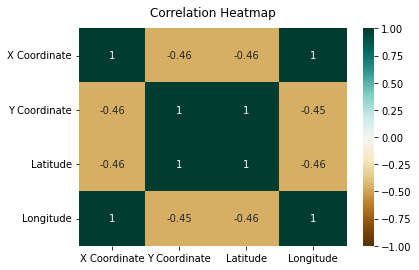

In [ ]:
import seaborn as sns 

heatmap=sns.heatmap(data[num_col].corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

As evident, we can see that the X Coordinate is perfectly correlated to the Longitude while the Y coordinate is perfectly correlated to the latitude. There is not much correlation between X and Y coordinate and Lattidue and Longitude.

Now let us try to get the distribution of the numerical columns with a box plot 

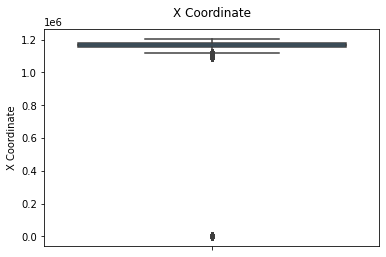

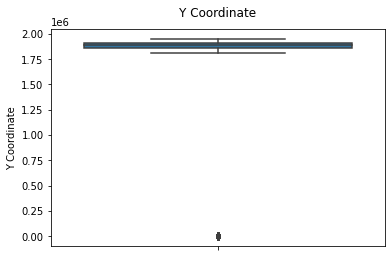

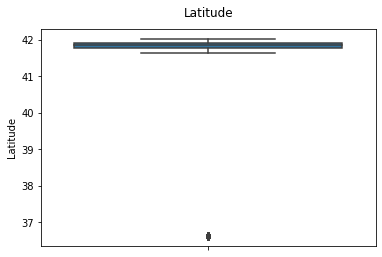

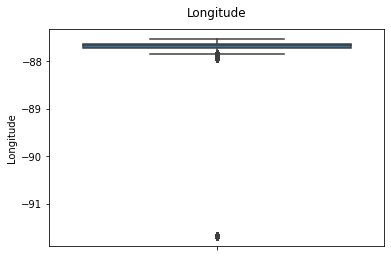

In [ ]:
import matplotlib.pyplot as plt
for col in num_col:

      box=sns.boxplot(y = data[col])
      box.set_title(col, fontdict={'fontsize':12}, pad=12)
      plt.show()

We can observe that variance in values of X and Y coordinates and the Latitude Coordinates is quiet small. Therefore these features may not add any extra information if we add them to our model. We will perform variable selection later on to confirm that and drop these variables if neccessary.

### Boolean Columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


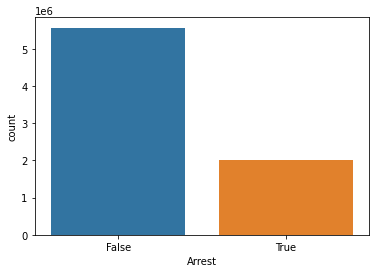

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


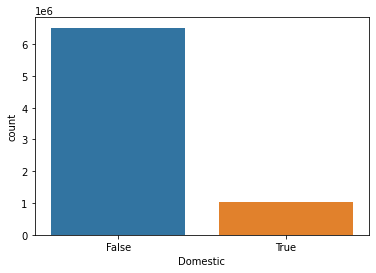

In [ ]:
for col in bool_col:

      count=sns.countplot(data[col])
      box.set_title(col, fontdict={'fontsize':12}, pad=12)
      plt.show()

We can observe the following things:
- In most crimes , arrests are not made. 
- Majority of the crimes are not related to domestic violence (as defined by the Illinois Domestic Violence Act) 

We can also check how the above boolean variables relate to various types of crimes which is our target label.

In [ ]:
def stacked_bar(df_inp,y_col,col_list,fig_height=10,fig_width=5,is_perc=False):
  import matplotlib.pyplot as plt 

  for col in col_list:
  
        df_test=df_inp.groupby(y_col)[col].value_counts(is_perc).unstack(col).fillna(0)
        s = df_test.sum(axis=1).sort_values(ascending=True)
        df_test=df_test.loc[s.index]
        count=df_test.plot.barh(stacked=True,figsize=(fig_width, fig_height))
        count.set_title(col, fontdict={'fontsize':12}, pad=12)

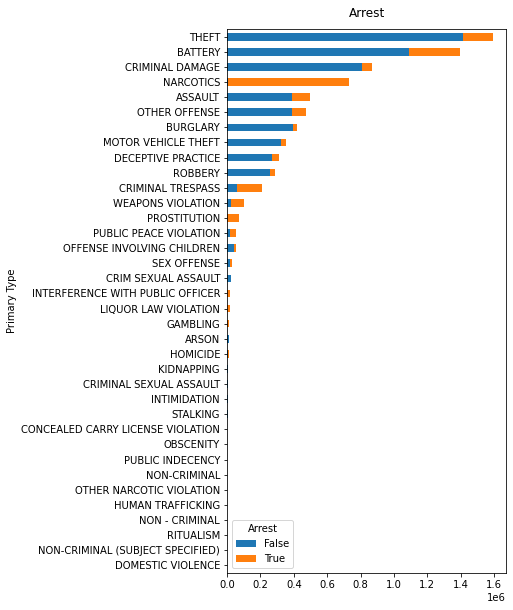

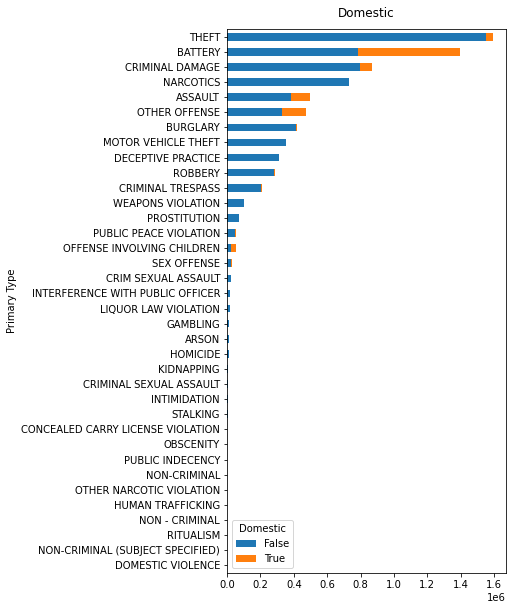

In [ ]:
  stacked_bar(data,'Primary Type',bool_col,is_perc=False)

We can make the following inferences from the data :    
- For the arrests made , Theft, Battery and Criminal Damage have the least number of arrests made as compared to the total crimes committed. On the other hand, Narcotics, Weapons Violation and prostitution have the highest proportion of arrests made. 
- For domestic violence, most crimes are of the type Battery, Criminal Damage and Assault

### Categorical Columns

In [ ]:
col_list= [  'Primary Type', 'District', 'Ward', 'Community Area',
       'FBI Code', 'Year']

def normal_bar(df_inp,col_list,fig_height=10,fig_width=5,is_perc=False):
  import matplotlib.pyplot as plt 

  for col in col_list:
  
        df_test=pd.DataFrame(data[col].value_counts(normalize=is_perc).sort_values(ascending=True))
        
        #df_test=df_test.loc[s.index]
        count=df_test.plot.barh(stacked=False,figsize=(fig_width, fig_height))
        count.set_title(col, fontdict={'fontsize':12}, pad=12)



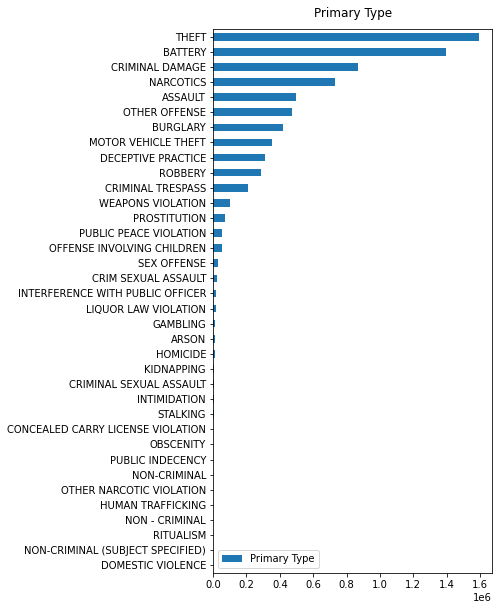

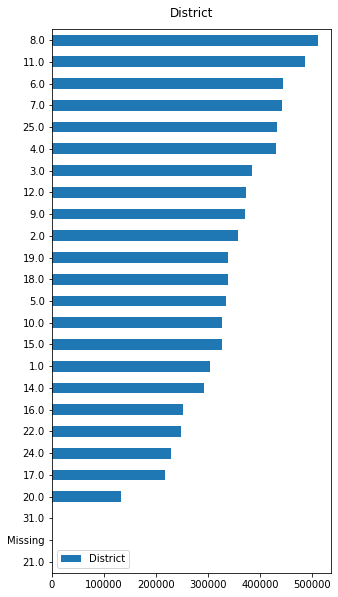

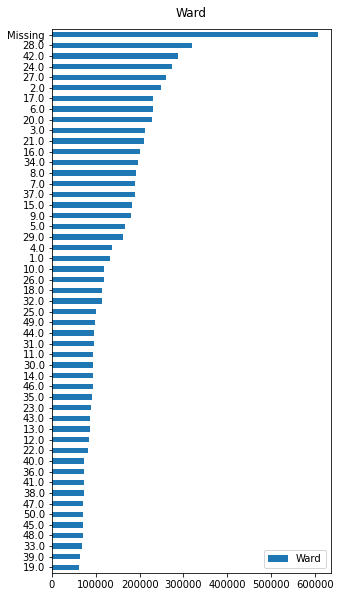

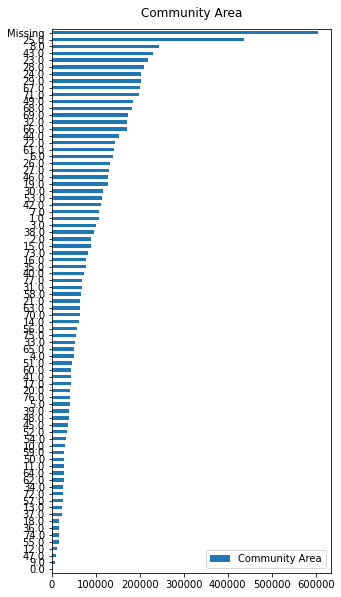

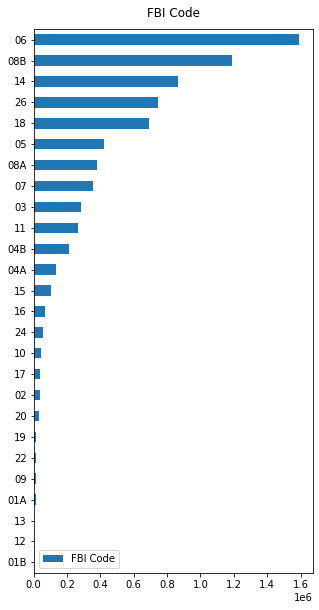

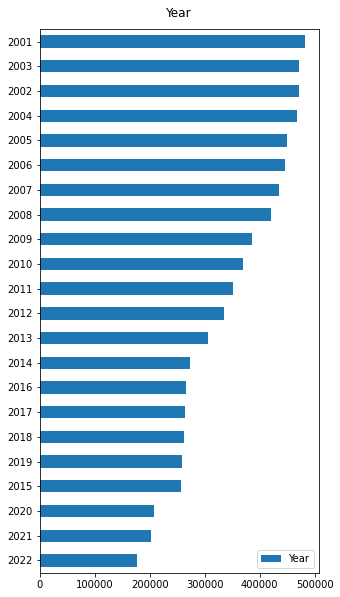

In [ ]:
normal_bar(data,col_list)

We can infer the following things
- Theft,Battery,Narcotics and Assault are the most common crimes. 
- Only a few type of criminal activities make up for the majority of crimes occuring. Since its our target variable, our dataset is unbalalanced and we might need to sample equally from each crime type to get desirable results in our model.
- Most values in Community Area and Ward are missing. 
- Number of crimes have reduced as the years have progressed.

## Logistic Regression on the Dataset ( Run the code from here without going through the EDA part)

In [ ]:
import pandas as pd
import numpy as np
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#from fancyimpute import IterativeImputer as MICE

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# # For CSV file
# file_id = '1FNLJjNeEmy-HzUA_ghtjRYeJcXYJiGHS'
# download = drive.CreateFile({'id': file_id})
# download.GetContentFile('ChicagoData.csv')
# data = pd.read_csv("ChicagoData.csv")
# data.head()

# # For Pickle Data file
# file_id = '1iNTFeAEgyIVzXENvR6Hogg3sNSfIZPkX'
# download = drive.CreateFile({'id': file_id})
# download.GetContentFile('data.pkl')
# data = pd.read_pickle("data.pkl")
# data.head()

# For Pickle Debug Data file
file_id = '18tivYo3gBtl3TOjP7xek6KMdP0I3e83y'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('debug.pkl')
data_debug = pd.read_pickle("debug.pkl")
data_debug.head()




## Data Preprocessing Functions 

def df_preproc(data):
      data = data.dropna(subset=['Location Description', 'X Coordinate','Y Coordinate','Latitude','Longitude','Location'])
      #data_debug=data_debug.dropna(subset=['Location Description', 'X Coordinate','Y Coordinate','Latitude','Longitude','Location'])
## Replacing the remaining missing values with 'Missing'

      data.fillna('Missing',inplace=True)
      #data_debug.fillna('Missing',inplace=True)

      ## Dropping ID column 

      data=data.drop(['ID'], axis=1)
      #data_debug=data_debug.drop(['ID'], axis=1)
      ## Changing Data type of Year and Beat

      data[['Beat','Year', 'Community Area', 'Ward', 'District']] = data[['Beat','Year', 'Community Area', 'Ward', 'District']].astype(str)
      #data_debug[['Beat','Year']] = data_debug[['Beat','Year']].astype(str)

      return data

# data=df_preproc(data)
data_debug=df_preproc(data_debug)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### Selecting some major columns and splitting the dataset into training and testing (after one hot encoding the categorical variables)

In [ ]:
final_col_list=['Location Description',  'Primary Type', 'District', 'Ward', 'Community Area',
       'FBI Code','Latitude', 'Longitude','Arrest', 'Domestic','tsDate']

## Whole Data Set       
# X=data[final_col_list].copy()
# y_label=X['Primary Type']
# X.drop(['Primary Type'], axis = 1,inplace=True)
# X=pd.get_dummies(X, drop_first=True)

# from sklearn.model_selection import train_test_split
# train_data, test_data,y_train,y_test = train_test_split(X,y_label, test_size = 0.2, random_state = 42)

## Debug Dataset

X_debug=data_debug[final_col_list].copy()
y_label_debug=X_debug['Primary Type']
X_debug.drop(['Primary Type'], axis = 1,inplace=True)
X_debug=pd.get_dummies(X_debug, drop_first=True)

#data.drop(['Case Number'], axis = 1)

from sklearn.model_selection import train_test_split
train_data_debug, test_data_debug,y_train_debug,y_test_debug = train_test_split(X_debug,y_label_debug, test_size = 0.2, random_state = 42)





In [ ]:
X_debug.head()

,Latitude,Longitude,Arrest,Domestic,tsDate,Location Description_ALLEY,Location Description_APARTMENT,Location Description_APPLIANCE STORE,Location Description_ATHLETIC CLUB,Location Description_BANK,...,FBI Code_14,FBI Code_15,FBI Code_16,FBI Code_17,FBI Code_18,FBI Code_19,FBI Code_20,FBI Code_22,FBI Code_24,FBI Code_26
0,41.815117,-87.670000,False,True,1441459800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41.895080,-87.765400,False,False,1441366200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,41.937406,-87.716650,True,False,1441457100,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,41.881903,-87.755121,False,True,1441458000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,41.744379,-87.658431,False,False,1441450500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train_debug.value_counts()

BATTERY                             171
THEFT                               159
CRIMINAL DAMAGE                      90
NARCOTICS                            76
ASSAULT                              50
OTHER OFFENSE                        35
BURGLARY                             33
ROBBERY                              28
DECEPTIVE PRACTICE                   26
MOTOR VEHICLE THEFT                  23
CRIMINAL TRESPASS                    20
WEAPONS VIOLATION                    13
OFFENSE INVOLVING CHILDREN            8
INTERFERENCE WITH PUBLIC OFFICER      7
PUBLIC PEACE VIOLATION                6
CRIM SEXUAL ASSAULT                   4
SEX OFFENSE                           3
LIQUOR LAW VIOLATION                  2
GAMBLING                              1
STALKING                              1
Name: Primary Type, dtype: int64

### Label Encoding the target variable 


We have decided to group the target variable into larger groups (Under common criminal themes), so that it is easier for our multiclass classification model to predict the classes with certainty. The groups can be seen below under the `CrimeMap` dictionary

In [ ]:
Map = {
'ASSAULT':0,
'BATTERY':6,
'HOMICIDE':15,
'DOMESTIC VIOLENCE':35,

'CRIMINAL DAMAGE':1,
'ARSON':25,

'MOTOR VEHICLE THEFT':2,
'THEFT':3,
'BURGLARY':5,
'ROBBERY':10,

'NARCOTICS':4,
'OTHER NARCOTIC VIOLATION':28,

'CRIMINAL TRESPASS':7,
'OTHER OFFENSE':8,
'DECEPTIVE PRACTICE':9,
'PUBLIC PEACE VIOLATION':16,
'LIQUOR LAW VIOLATION':19,
'INTERFERENCE WITH PUBLIC OFFICER':20,
'GAMBLING':22,
'NON - CRIMINAL':26,
'PUBLIC INDECENCY':29,
'NON-CRIMINAL':30,
'OBSCENITY':31,
'RITUALISM':33,
'NON-CRIMINAL (SUBJECT SPECIFIED)':34,

'WEAPONS VIOLATION':11,
'CONCEALED CARRY LICENSE VIOLATION':27,

'OFFENSE INVOLVING CHILDREN':12,
'PROSTITUTION':13,
'CRIM SEXUAL ASSAULT':18,
'SEX OFFENSE':21,
'CRIMINAL SEXUAL ASSAULT':23,
'HUMAN TRAFFICKING':32,
'STALKING':14,
'INTIMIDATION':17,
'KIDNAPPING':24
}

CrimeMap = {
'ASSAULT':0,
'BATTERY':0,
'HOMICIDE':0,
'DOMESTIC VIOLENCE':0,

'CRIMINAL DAMAGE':1,
'ARSON':1,

'MOTOR VEHICLE THEFT':2,
'THEFT':2,
'BURGLARY':2,
'ROBBERY':2,

'NARCOTICS':3,
'OTHER NARCOTIC VIOLATION':3,

'CRIMINAL TRESPASS':4,
'OTHER OFFENSE':4,
'DECEPTIVE PRACTICE':4,
'PUBLIC PEACE VIOLATION':4,
'LIQUOR LAW VIOLATION':4,
'INTERFERENCE WITH PUBLIC OFFICER':4,
'GAMBLING':4,
'NON - CRIMINAL':4,
'PUBLIC INDECENCY':4,
'NON-CRIMINAL':4,
'OBSCENITY':4,
'RITUALISM':4,
'NON-CRIMINAL (SUBJECT SPECIFIED)':4,

'WEAPONS VIOLATION':5,
'CONCEALED CARRY LICENSE VIOLATION':5,
'OFFENSE INVOLVING CHILDREN':5,
'PROSTITUTION':5,
'CRIM SEXUAL ASSAULT':5,
'SEX OFFENSE':5,
'CRIMINAL SEXUAL ASSAULT':5,
'HUMAN TRAFFICKING':5,
'STALKING':5,
'INTIMIDATION':5,
'KIDNAPPING':5
}


# y_train= y_train.map(Map)
# y_test = y_test.map(Map)

y_train_debug= y_train_debug.map(CrimeMap)
y_test_debug = y_test_debug.map(CrimeMap)

### Defining functions to gauge model performance in a multiclass setting

In [ ]:
def performance_metrics (y_true_train,y_true_test,y_train_pred,y_test_pred):

            acc_train = accuracy_score(y_true_train,y_train_pred)
            acc_test = accuracy_score(y_true_test,y_test_pred)
            macro_averaged_precision = metrics.precision_score(y_true_test, y_test_pred, average = 'macro')
            micro_averaged_precision = metrics.precision_score(y_true_test, y_test_pred, average = 'micro')
            macro_averaged_recall = metrics.recall_score(y_true_test, y_test_pred, average = 'macro')
            micro_averaged_recall = metrics.recall_score(y_true_test, y_test_pred, average = 'micro')
            macro_averaged_f1 = metrics.f1_score(y_true_test, y_test_pred, average = 'macro')
            micro_averaged_f1 = metrics.f1_score(y_true_test, y_test_pred, average = 'micro')
            print('Accuracy Train : ', round(acc_train,4))
            print('Accuracy  Test : ', round(acc_test,4))
            print(f"Macro-Averaged Precision score  : {round(macro_averaged_precision,4)}")
            print(f"Micro-Averaged Precision score  : {round(micro_averaged_precision,4)}")
            print(f"Macro-Averaged Recall score  : {round(macro_averaged_recall,4)}")
            print(f"Micro-Averaged Recall score  : {round(micro_averaged_recall,4)}")
            print(f"Macro-Averaged F1 score  : {round(macro_averaged_f1,4)}")
            print(f"Micro-Averaged F1 score  : {round(micro_averaged_f1,4)}")


from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler 
# oversample = RandomOverSampler(random_state=42)


In [ ]:


#train_data_debug=pd.get_dummies(train_data_debug)



In [ ]:
# train_data_debug,y_train_debug = oversample.fit_resample(train_data_debug,y_train_debug)

In [ ]:
y_train_debug.value_counts()

2    243
0    221
4     97
1     90
3     76
5     29
Name: Primary Type, dtype: int64

Trying Logistic Regression on the Data Set

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
lg.fit(train_data_debug,y_train_debug)

y_train_pred_debug = lg.predict(train_data_debug)
y_test_pred_debug = lg.predict(test_data_debug)


Plotting the confusion matrix between the predicted and actual values in the test dataset

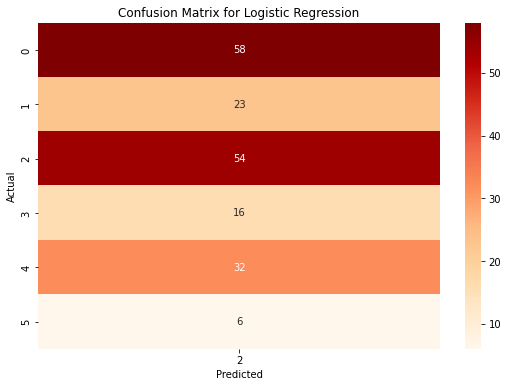

In [ ]:
# Confusion Matrix 
import matplotlib.pyplot as plt
import seaborn as sns
con_matrix = pd.crosstab(pd.Series(y_test_debug.values.flatten(), name='Actual' ),pd.Series(y_test_pred_debug, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(con_matrix, cmap="OrRd", annot=True, fmt='g')
plt.show()

We can observe that due to class imbalance, logistic regression is only predicting the most dominant class which is class 2

Trying Randomforest for the multiclass classification problem

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight='balanced').fit(train_data_debug,y_train_debug)

In [ ]:
y_train_pred_debug = clf.predict(train_data_debug)
y_test_pred_debug = clf.predict(test_data_debug)

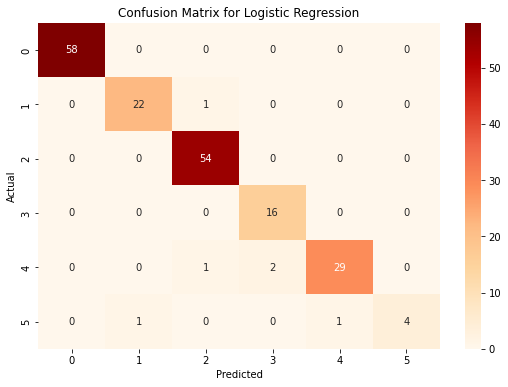

In [ ]:
con_matrix = pd.crosstab(pd.Series(y_test_debug.values.flatten(), name='Actual' ),pd.Series(y_test_pred_debug, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix for Random Forest")
sns.heatmap(con_matrix, cmap="OrRd", annot=True, fmt='g')
plt.show()

We have obtained better results from the Random Forest Classifier as compared to the logistic regression classifier